# LAB: KNN 

## 1. Introducción

El objetivo de este LAB es clasificar si un determinado tipo de vino es de alta o baja calidad. Para eso usaremos un dataset que contiene un set amplio de features vinculados a diversas características del vino, tales como acidez, azúclar, densidad, ph, si es tinto, etc.

Usaremos como target high_quality, una discretización de la variable quality.

Para llevar a cabo esta tarea ,como input vamos a usar las features de cada vino.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("wine.csv")
df.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
4964,7.6,0.20,0.26,4.8,0.033,26.0,76.0,0.99076,2.98,0.49,12.3,7,white,0.0,1.0
299,6.9,0.67,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.6,5,red,1.0,0.0
2688,7.0,0.17,0.33,4.0,0.034,17.0,127.0,0.99340,3.19,0.39,10.6,7,white,0.0,1.0
389,9.6,0.38,0.31,2.5,0.096,16.0,49.0,0.99820,3.19,0.70,10.0,7,red,1.0,1.0
5451,5.9,0.20,0.23,1.5,0.037,38.0,93.0,0.99021,3.36,0.49,12.0,6,white,0.0,0.0
694,9.0,0.47,0.31,2.7,0.084,24.0,125.0,0.99840,3.31,0.61,9.4,5,red,1.0,0.0
5701,6.9,0.37,0.23,9.5,0.057,54.0,166.0,0.99568,3.23,0.42,10.0,5,white,0.0,0.0
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6,red,1.0,0.0
5213,6.4,0.38,0.24,7.2,0.047,41.0,151.0,0.99604,3.11,0.60,9.2,5,white,0.0,0.0
978,7.0,0.40,0.32,3.6,0.061,9.0,29.0,0.99416,3.28,0.49,11.3,7,red,1.0,1.0


## 2. Preprocesamiento y limpieza del dataset

In [2]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.196552
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.397421
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  is_red                6497 non-null   float64
 14  high_quality          6497 non-null   float64
dtypes: float64(13), int64

In [4]:
pd.get_dummies(df['color'], drop_first=True)

,white
0,0
1,0
2,0
3,0
4,0
...,...
6492,1
6493,1
6494,1
6495,1


In [5]:
df['white']=pd.get_dummies(df['color'], drop_first=True)

In [6]:
df1=df.drop(labels='quality', axis=1)
df1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color,is_red,high_quality,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red,1.0,0.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,red,1.0,0.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,red,1.0,0.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,red,1.0,0.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,red,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,white,0.0,0.0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,white,0.0,0.0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,white,0.0,0.0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,white,0.0,1.0,1


In [7]:
X = df1.drop(labels=['high_quality', 'is_red', 'color'], axis=1)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [8]:
y = df['high_quality']
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    0.0
6493    0.0
6494    0.0
6495    1.0
6496    0.0
Name: high_quality, Length: 6497, dtype: float64

In [9]:
pd.Series(y).value_counts(normalize=True)

0.0    0.803448
1.0    0.196552
Name: high_quality, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [12]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)

In [13]:
scores_para_df_standar = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [14]:
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar.head()

,score_medio,score_std,n_neighbours
0,0.839901,0.013282,1
1,0.843595,0.011729,2
2,0.837850,0.009305,3
3,0.841543,0.006114,4
4,0.836002,0.009383,5


In [15]:
df_scores_standar['limite_superior'] = df_scores_standar['score_medio'] + df_scores_standar['score_std']
df_scores_standar['limite_inferior'] = df_scores_standar['score_medio'] - df_scores_standar['score_std']
df_scores_standar.head()

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
0,0.839901,0.013282,1,0.853183,0.826619
1,0.843595,0.011729,2,0.855324,0.831866
2,0.837850,0.009305,3,0.847154,0.828545
3,0.841543,0.006114,4,0.847658,0.835429
4,0.836002,0.009383,5,0.845385,0.826619


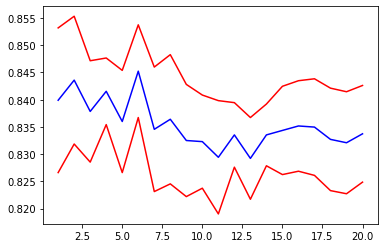

In [16]:

plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_inferior'],color='r')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['score_medio'],color='b')
plt.plot(df_scores_standar['n_neighbours'],df_scores_standar['limite_superior'],color='r');

In [17]:
df_scores_standar.loc[df_scores_standar.score_medio == df_scores_standar.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_superior,limite_inferior
5,0.845238,0.008511,6,0.853748,0.836727


In [18]:
best_k = df_scores_standar.loc[df_scores_standar.score_medio ==\
                               df_scores_standar.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k

6

In [19]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [20]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred)

array([[1238,   68],
       [ 196,  123]], dtype=int64)

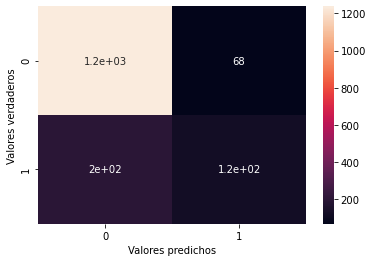

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Valores verdaderos')
plt.xlabel('Valores predichos');

### 3.1 Realizar un modelo de K-Nearest Neighbors

- Construir la matriz de features.
- Construir la variable target: `high_quality`
- Seleccionar los atribiutos que podrian ser los mejores para el modelo
- Evaluar la accuracy del modelo mediante Cross-Validation
- Experimentar con diferentes valores para el hiperparámetro K y evaluar la performance
- ¿Necesitamos estandarizar las variables?

** Pista:** pueden tratar de generar una función que evalúe diferentes valores del hiperparámetro K.

In [23]:
(1238 + 123) / len(y_pred)

0.8375384615384616

In [24]:
len(y_pred)

1625